In [27]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [28]:
df = pd.read_csv('./weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [29]:
df

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12
...,...,...
3280,2016-12-27,1
3281,2016-12-28,-3
3282,2016-12-29,0
3283,2016-12-30,3


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [30]:
df['year'] = df.Day.dt.year
df['month'] = df.Day.dt.month

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [31]:
df[(df.month == 1) & (df.t >= 0)].year.value_counts().index[0]

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [32]:
means = df[(df.month >= 6) & (df.month <= 8)].groupby('year').mean()
means[means.t == means.t.min()].index[0]

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [33]:
df['t_diff'] = df.t.diff()
df[df.t_diff == df.t_diff.max()]

,Day,t,year,month,t_diff
1819,2012-12-27,3,2012,12,14.0


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:xlabel='year'>

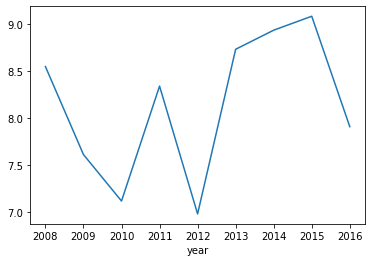

In [34]:
avg_temps = df.groupby('year').mean()

avg_temps.t.plot()